# Explore Capital Need for the Banking System of Ghana(Millions of Ghana Cedis)

In [2]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
assetData = pd.read_csv('banking_system_asset_ghana.csv')
liabilityData = pd.read_csv('banking_system_liability_ghana.csv')

In [4]:
assetData.head()

,Year,Interest Rates,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
0,2022,29.5,"137,474.29","139,444.38","142,729.13","142,563.67","142,642.75","145,156.93","150,415.50","152,455.83","160,157.59","187,659.20","194,979.44","180,266.84","1,875,945.55"
1,2021,22.5,"117,976.85","118,467.48","119,445.22","118,933.79","120,451.55","121,891.32","122,643.76","123,548.57","124,596.60","129,231.01","131,645.92","135,555.75","1,484,387.82"
2,2020,25.0,"91,907.42","91,762.67","92,905.07","94,556.02","98,540.00","100,498.91","101,564.14","102,814.68","109,134.38","112,859.69","116,597.74","120,521.82","1,233,662.54"
3,2019,27.5,"78,580.20","80,115.31","81,837.16","81,021.35","81,870.59","83,517.12","81,991.64","82,381.98","85,873.08","86,834.80","89,750.09","92,952.95","1,006,726.27"
4,2018,28.0,"65,731.09","65,460.47","67,318.47","68,362.48","68,909.37","68,402.24","71,413.78","73,665.72","73,821.71","74,641.05","75,899.85","76,380.39","850,006.62"


In [5]:
liabilityData.head()

,Year,Interest Rates,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
0,2022,29.5,"137,474.29","139,444.38","142,729.13","142,563.67","142,642.75","145,156.93","150,415.50","152,455.83","160,157.59","187,659.20","194,979.44","180,266.84","1,875,945.55"
1,2021,22.5,"117,976.85","118,467.48","119,445.22","118,933.79","120,451.55","121,891.32","122,643.76","123,548.57","124,596.60","129,231.01","131,645.92","135,555.75","1,484,387.82"
2,2020,25.0,"91,907.42","91,762.67","92,905.07","94,556.02","98,540.00","100,498.91","101,564.14","102,814.68","109,134.38","112,859.69","116,597.74","120,521.82","1,233,662.54"
3,2019,27.5,"78,580.20","80,115.31","81,837.16","81,021.35","81,870.59","83,517.12","81,991.64","82,381.98","85,873.08","86,834.80","89,750.09","92,952.95","1,006,726.27"
4,2018,28.0,"65,731.09","65,460.47","67,318.47","68,362.48","68,909.37","68,402.24","71,413.78","73,665.72","73,821.71","74,641.05","75,899.85","76,380.39","850,006.62"


In [6]:
assetData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            23 non-null     int64  
 1   Interest Rates  23 non-null     float64
 2   Jan             23 non-null     object 
 3   Feb             23 non-null     object 
 4   Mar             23 non-null     object 
 5   Apr             23 non-null     object 
 6   May             23 non-null     object 
 7   Jun             23 non-null     object 
 8   Jul             23 non-null     object 
 9   Aug             23 non-null     object 
 10  Sep             23 non-null     object 
 11  Oct             23 non-null     object 
 12  Nov             23 non-null     object 
 13  Dec             23 non-null     object 
 14  Total           23 non-null     object 
dtypes: float64(1), int64(1), object(13)
memory usage: 2.8+ KB


In [7]:
liabilityData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            23 non-null     int64  
 1   Interest Rates  23 non-null     float64
 2   Jan             23 non-null     object 
 3   Feb             23 non-null     object 
 4   Mar             23 non-null     object 
 5   Apr             23 non-null     object 
 6   May             23 non-null     object 
 7   Jun             23 non-null     object 
 8   Jul             23 non-null     object 
 9   Aug             23 non-null     object 
 10  Sep             23 non-null     object 
 11  Oct             23 non-null     object 
 12  Nov             23 non-null     object 
 13  Dec             23 non-null     object 
 14  Total           23 non-null     object 
dtypes: float64(1), int64(1), object(13)
memory usage: 2.8+ KB


In [8]:
def check_data(df):
    print(80 * "*")
    print('DIMENSION: ({}, {})'.format(df.shape[0], df.shape[1]))
    print(80 * "*")
    print("COLUMNS:\n")
    print(df.columns.values)
    print(80 * "*")
    print("DATA INFO:\n")
    print(df.dtypes)
    print(80 * "*")
    print("MISSING VALUES:\n")
    print(df.isnull().sum())
    print(80 * "*")
    print("NUMBER OF UNIQUE VALUES:\n")
    print(df.nunique())

In [9]:
check_data(assetData)

********************************************************************************
DIMENSION: (23, 15)
********************************************************************************
COLUMNS:

['Year' 'Interest Rates' 'Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug'
 'Sep' 'Oct' 'Nov' 'Dec' 'Total']
********************************************************************************
DATA INFO:

Year                int64
Interest Rates    float64
Jan                object
Feb                object
Mar                object
Apr                object
May                object
Jun                object
Jul                object
Aug                object
Sep                object
Oct                object
Nov                object
Dec                object
Total              object
dtype: object
********************************************************************************
MISSING VALUES:

Year              0
Interest Rates    0
Jan               0
Feb               0
Mar               0
Apr   

In [10]:
check_data(liabilityData)

********************************************************************************
DIMENSION: (23, 15)
********************************************************************************
COLUMNS:

['Year' 'Interest Rates' 'Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug'
 'Sep' 'Oct' 'Nov' 'Dec' 'Total']
********************************************************************************
DATA INFO:

Year                int64
Interest Rates    float64
Jan                object
Feb                object
Mar                object
Apr                object
May                object
Jun                object
Jul                object
Aug                object
Sep                object
Oct                object
Nov                object
Dec                object
Total              object
dtype: object
********************************************************************************
MISSING VALUES:

Year              0
Interest Rates    0
Jan               0
Feb               0
Mar               0
Apr   

In [23]:
assetData['Total'] =assetData['Total'].str.replace(',', '').astype(float)


In [24]:
assetX = assetData[['Year','Interest Rates' ]]
assetY = assetData['Total']

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(assetX, assetY, test_size = 0.3)

In [26]:
assetModel = LinearRegression()

In [27]:
assetModel.fit(x_train, y_train)

LinearRegression()

In [28]:
print(assetModel.coef_)

[60413.43315525 33789.07784665]


In [29]:
print(assetModel.intercept_)

-121789669.86820045


In [30]:
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [33]:
pd.DataFrame(assetModel.coef_, assetX.columns, columns = ['Coeff'])

,Coeff
Year,60413.433155
Interest Rates,33789.077847


In [36]:
predictions = assetModel.predict(x_test)

In [37]:
predictions

array([1066132.79010126,   19644.79369152,  353466.50247079,
        703652.19116978,  993424.44671351,  148166.94154368,
         89788.04323204])

In [41]:
y_test

1     1484387.82
20      14316.63
10     239918.37
7      483533.95
5      725428.69
12     134194.71
18      27560.77
Name: Total, dtype: float64

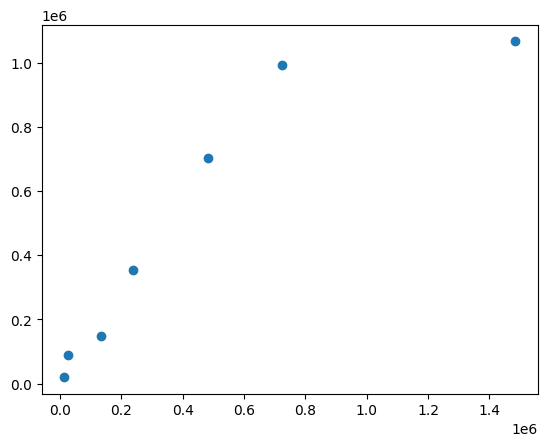

In [44]:
plt.scatter(y_test, predictions)

(array([2., 0., 2., 2., 0., 0., 0., 0., 0., 1.]),
 array([-267995.75671351, -199370.67805228, -130745.59939106,
         -62120.52072983,    6504.55793139,   75129.63659262,
         143754.71525384,  212379.79391507,  281004.87257629,
         349629.95123752,  418255.02989874]),
 <BarContainer object of 10 artists>)

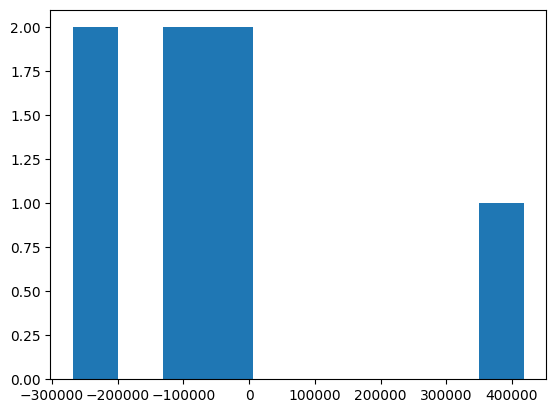

In [42]:
plt.hist(y_test - predictions)

In [43]:
from sklearn import metrics

metrics.mean_absolute_error(y_test, predictions)

metrics.mean_squared_error(y_test, predictions)

np.sqrt(metrics.mean_squared_error(y_test, predictions))

211187.14119805594

In [53]:
liabilityData['Total'] =assetData['Total'].str.replace(',', '').astype(float)

AttributeError: Can only use .str accessor with string values!

In [54]:
liabiltyX = liabilityData[['Year','Interest Rates' ]]
liabiltyY = liabilityData['Total']

In [55]:
l_x_train, l_x_test, l_y_train, l_y_test = train_test_split(liabiltyX, liabiltyY, test_size = 0.3)

In [57]:
liabilityModel = LinearRegression()

In [58]:
liabilityModel.fit(l_x_train, l_y_train)

LinearRegression()

In [60]:
print(liabilityModel.coef_)

[68185.4389343  30872.78104687]


In [61]:
print(liabilityModel.intercept_)

-137344432.88895744


In [62]:
pd.DataFrame(liabilityModel.coef_, liabiltyX.columns, columns = ['Coeff'])

,Coeff
Year,68185.438934
Interest Rates,30872.781047


In [64]:
predictions = liabilityModel.predict(l_x_test)

In [65]:
predictions

array([1161973.2844907 ,  112202.15942767, 1170969.79817361,
       -186299.10367176,  598496.74565059, 1034598.92030501,
        239576.52361333])

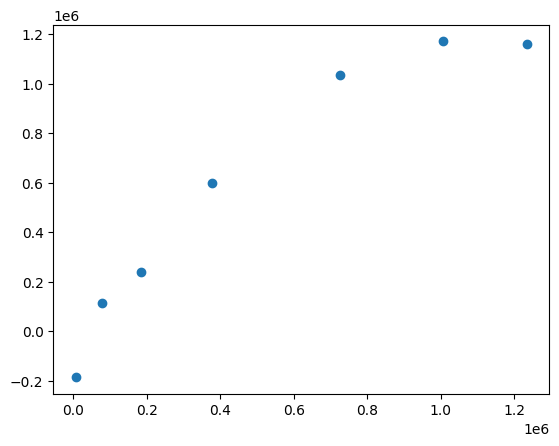

In [67]:
plt.scatter(l_y_test, predictions)

(array([1., 1., 1., 0., 0., 2., 0., 1., 0., 1.]),
 array([-309170.23030501, -258921.57090734, -208672.91150966,
        -158424.25211198, -108175.5927143 ,  -57926.93331663,
          -7678.27391895,   42570.38547873,   92819.0448764 ,
         143067.70427408,  193316.36367176]),
 <BarContainer object of 10 artists>)

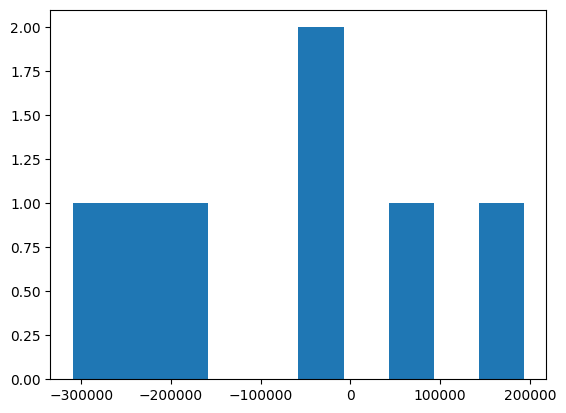

In [69]:
plt.hist(l_y_test - predictions)

In [79]:
from sklearn import metrics

metrics.mean_absolute_error(l_y_test, predictions)

metrics.mean_squared_error(l_y_test, predictions)

np.sqrt(metrics.mean_squared_error(l_y_test, predictions))

176687.44939572012

In [73]:
import pickle

In [75]:
pkl_filename = "pickle_liabilityModel.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(liabilityModel, file)

In [77]:
with open(pkl_filename, 'rb') as file:
    liabilityModel = pickle.load(file)

In [80]:
liabilityPredict = liabilityModel.predict(l_x_test)

In [81]:
liabilityPredict

array([1161973.2844907 ,  112202.15942767, 1170969.79817361,
       -186299.10367176,  598496.74565059, 1034598.92030501,
        239576.52361333])

In [84]:
l_x_test

,Year,Interest Rates
2,2020,25.0
14,2008,17.5
3,2019,27.5
22,2000,25.5
8,2014,20.0
5,2017,27.5
11,2011,15.0


In [85]:
 l_y_test

2     1233662.54
14      78421.32
3     1006726.27
22       7017.26
8      376263.21
5      725428.69
11     185469.59
Name: Total, dtype: float64

In [86]:
pkl_asset_filename = "pickle_assetModel.pkl"
with open(pkl_asset_filename, 'wb') as file:
    pickle.dump(assetModel, file)

In [88]:
with open(pkl_asset_filename, 'rb') as file:
    assetModel = pickle.load(file)

In [89]:
assetPredict = assetModel.predict(x_test)

In [90]:
assetPredict

array([1066132.79010126,   19644.79369152,  353466.50247079,
        703652.19116978,  993424.44671351,  148166.94154368,
         89788.04323204])

In [91]:
x_test

,Year,Interest Rates
1,2021,22.5
20,2002,25.5
10,2012,17.5
7,2015,22.5
5,2017,27.5
12,2010,15.0
18,2004,24.0


In [92]:
y_test

1     1484387.82
20      14316.63
10     239918.37
7      483533.95
5      725428.69
12     134194.71
18      27560.77
Name: Total, dtype: float64

In [98]:
assetPredict2 =  assetModel.predict("Year"=[2022], "Interest Rates"=[24])

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (3446976857.py, line 1)

In [101]:
inputData = pd.DataFrame({'Year': [2022], 'Interest Rates': [20]})

In [102]:
inputData

,Year,Interest Rates
0,2022,20


In [103]:
assetPredict2 =  assetModel.predict(inputData)

In [104]:
assetPredict2

array([1042073.52863987])